#### 목표
- 고객의 구매 데이터를 이용해서 군집분석을 해보자.
- 영국 온라인 소매 플랫폼에서 2010년 12월 1일 부터 2011년 12월 9일 까지 발생한 실제 거래 데이터

#### 1.1 데이터 로딩

In [1]:
import pandas as pd

In [3]:
data = pd.read_excel("./data/Online Retail.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# 컬럼정보
# 'InvoiceNo' 주문번호, 'C'로 시작하는 것은 취소 주문
# 'StockCode' 제품코드(item code)
# 'Description' 제품설명
# 'Quantity' 주문 제품 건수
# 'InvoiceDate' 주문일자
# 'UnitPrice' 제품 단가
# 'CustomerID' 고객 번호 
# 'Country' 국가명 (주문 고객의 국적)

#### 1.2 데이터 전처리 및 탐색

In [9]:
# 오류데이터 정리
# 주문수량과 제품단가가 음수인것 제거
# 주문 고객 번호가 누락된 데이터 제거 
data = data[data['Quantity']>0]
data = data[data['UnitPrice']>0]
data = data[data['CustomerID'].notnull()]

# 고객번호 정수형으로 변환
data['CustomerID'] = data['CustomerID'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [11]:
# 중복데이터 삭제
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(392692, 8)

##### 1.2.1 제품수, 거래건수, 고객수 파악

In [18]:
print("제품수 : ",len(data['StockCode'].value_counts()))

제품수 :  3665


In [19]:
print("거래건수 : ",len(data['InvoiceNo'].value_counts()))

거래건수 :  18532


In [20]:
print("고객수 : ",len(data['CustomerID'].value_counts()))


고객수 :  4338


In [21]:
data['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

##### 1.2.2 특성공학

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [24]:
# 주문 금액
data['SaleAmount'] = data['Quantity'] * data['UnitPrice']

In [27]:
# 고객이 마지막으로 주문한 날짜, 주문 횟수, 주문 총액
agg = {
    'InvoiceNo' : 'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
}

customer_df = data.groupby(by='CustomerID').agg(agg)  # agg() : 다른 방법으로 집계내주는 함수
customer_df

,InvoiceNo,SaleAmount,InvoiceDate
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280,10,180.60,2011-03-07 09:52:00
18281,7,80.82,2011-06-12 10:53:00
18282,12,178.05,2011-12-02 11:43:00


In [28]:
customer_df = customer_df.rename(columns={
        'InvoiceNo':'Freq',
        'InvoiceDate': 'ElapseDays'
    })
customer_df

,Freq,SaleAmount,ElapseDays
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280,10,180.60,2011-03-07 09:52:00
18281,7,80.82,2011-06-12 10:53:00
18282,12,178.05,2011-12-02 11:43:00


In [29]:
# 마지막 주문으로부터 경과한 날짜 계산
import datetime
customer_df['ElapseDays'] = datetime.datetime(2011,12,10)-customer_df['ElapseDays']
customer_df

,Freq,SaleAmount,ElapseDays
CustomerID,,,
12346,1,77183.60,325 days 13:59:00
12347,182,4310.00,2 days 08:08:00
12348,31,1797.24,75 days 10:47:00
12349,73,1757.55,18 days 14:09:00
12350,17,334.40,310 days 07:59:00
...,...,...,...
18280,10,180.60,277 days 14:08:00
18281,7,80.82,180 days 13:07:00
18282,12,178.05,7 days 12:17:00


In [30]:
customer_df['ElapseDays'] = customer_df['ElapseDays'].apply(lambda x : x.days)
customer_df

,Freq,SaleAmount,ElapseDays
CustomerID,,,
12346,1,77183.60,325
12347,182,4310.00,2
12348,31,1797.24,75
12349,73,1757.55,18
12350,17,334.40,310
...,...,...,...
18280,10,180.60,277
18281,7,80.82,180
18282,12,178.05,7


##### 1.2.3 추출된 데이터 분포 확인

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

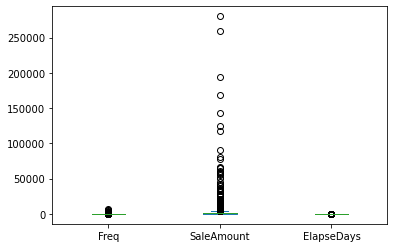

In [33]:
customer_df.plot(kind='box') # 사분위수 기반으로 그래프 그림

In [34]:
# SaleAmount 처럼 이상치가 큰 데이터는 분포를 변환시켜줄 필요가 있다. 
# 큰 값들의 폭을 많이 줄여주는 log변환을 해보자
import numpy as np

customer_df['Freq'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapseDays'] = np.log1p(customer_df['ElapseDays'])

<AxesSubplot:>

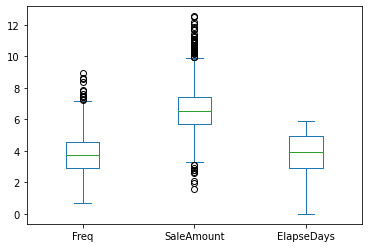

In [35]:
customer_df.plot(kind='box')

#### 1.3 군집분석

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(customer_df)
X_transformed

array([[-2.43820181,  3.7077163 ,  1.43541649],
       [ 1.18898578,  1.41490344, -1.95339285],
       [-0.21146474,  0.72002428,  0.38286482],
       ...,
       [-0.9349095 , -1.11333158, -1.24442502],
       [ 2.29130702,  0.82281217, -1.74544908],
       [ 0.42858139,  0.73752572, -0.028808  ]])

##### 1.2.1 최적의 군집 수 찾기

In [42]:
result = [] # 군집 중심과 샘플들 사이의 거리 제곱 총합

for i in range(1,11) : # 군집의 숫자를 1~10
    model = KMeans(n_clusters=i, random_state=1007)
    model.fit(X_transformed)
    result.append(model.inertia_)

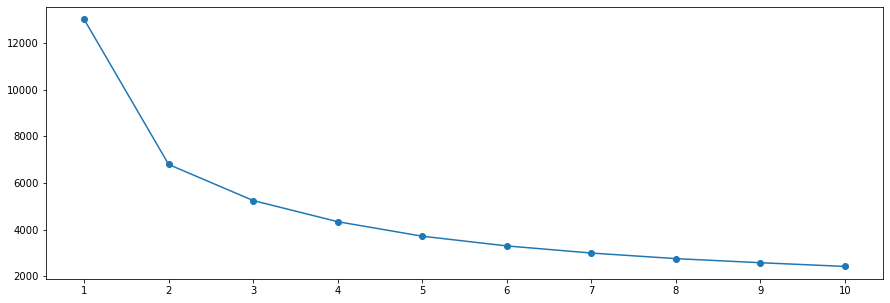

In [45]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11),result, marker='o')
plt.xticks(range(1,11))
plt.show()

##### 1.3.2 형성된 군집 분석하기

In [50]:
customer_model = KMeans(n_clusters=4, random_state=1007)
customer_model.fit(X_transformed)

KMeans(n_clusters=4, random_state=1007)

In [51]:
rs = customer_model.predict(X_transformed)
rs

array([0, 1, 0, ..., 2, 1, 0])

In [54]:
customer_df_origin = data.groupby(by='CustomerID').agg(agg)
customer_df_origin['Label'] = rs
customer_df_origin = customer_df_origin.rename(columns={
        'InvoiceNo':'Freq',
        'InvoiceDate': 'ElapseDays'
    })
customer_df_origin['ElapseDays'] = datetime.datetime(2011,12,10)-customer_df_origin['ElapseDays']
customer_df_origin['ElapseDays'] = customer_df_origin['ElapseDays'].apply(lambda x : x.days)
customer_df_origin

,Freq,SaleAmount,ElapseDays,Label
CustomerID,,,,
12346,1,77183.60,325,0
12347,182,4310.00,2,1
12348,31,1797.24,75,0
12349,73,1757.55,18,0
12350,17,334.40,310,3
...,...,...,...,...
18280,10,180.60,277,3
18281,7,80.82,180,3
18282,12,178.05,7,2


In [55]:
customer_df_origin.groupby(by='Label').mean()

,Freq,SaleAmount,ElapseDays
Label,,,
0,79.183360,1511.945374,94.756058
1,281.481308,7097.828902,12.310748
2,38.513450,616.056386,18.888889
3,14.964723,297.300771,183.843053


In [56]:
customer_df_origin['Label'].value_counts()

3    1389
0    1238
1     856
2     855
Name: Label, dtype: int64